### Exercise 9.5: FTCS solution of the wave equation
Consider a piano string of length $L$, initially at rest. At time $t = O$ the string is struck by the piano hammer a distance $d$ from the end of the string:

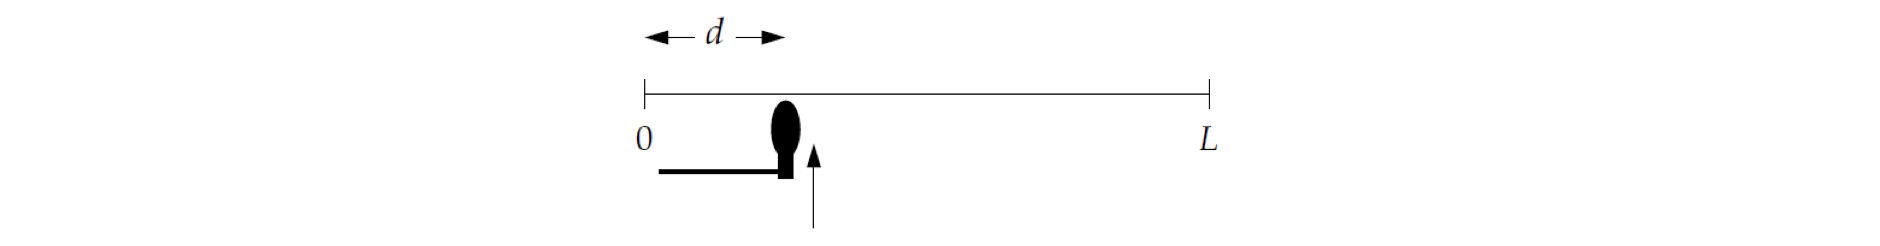

The string vibrates as a result of being struck, except at the ends, $x = 0$ and $x = L$, where it is held fixed.   
**a)** Write a program that uses the FTCS method to solve the complete set of simultaneous
first-order equations, Eq. (9.28), for the case $v = 100 ms^{-1}$, with the initial condition that $\phi(x) = 0$ everywhere but the velocity $\psi(x)$ is nonzero, with profile
\begin{gather}
    \psi(x) = C\frac{x(L-x)}{L^2} e^{-(x-d)^2/2\sigma^2}
\end{gather}
where $L = 1 m$, $d = 10 cm$, $C = 1 m/s$, and $\sigma = 0.3 m$. You will also need to choose a value for the time-step $h$. A reasonable choice is $h = 10^{-6} s$.
***

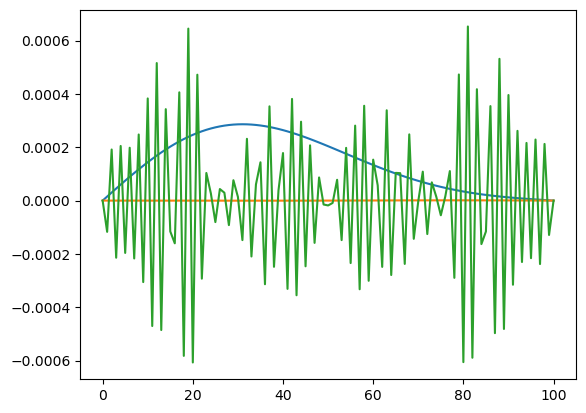

In [2]:
# Cell 1

import numpy as np
import math as m
import pylab as plt
from time import time

    # Constants 
L = 1.0       
C = 1.0      
d = 0.1       
N = 100       
o = 0.3   
a = L/N       
v = 100.0     
h = 1e-6      
ep = h/1000

    # Function containing the profile of the wave
def ipsi(x):
    return (C*x*(L - x) / (L**2)) * m.exp((-(x - d)**2) / (2 * o**2)) 

phii = 0.0       
phim = 0.0  
phif = 0.0     
psii = 0.0    
psif = 0.0     

t2 = 2e-3    
t50 = 50e-3   
t100 = 100e-3 
tend = t100 + ep


phi = np.empty(N+1,float)
phi[0] = phii
phi[N] = phif
phi[1:N] = phim

phip = np.empty(N+1,float)
phip[0] = phii
phip[N] = phif

psi = np.empty(N+1,float)
psi[0] = psii
psi[N] = psif

for i in range(1,N):
    psi[i] = ipsi(i*a)
    
psip = np.empty(N+1,float)
psip[0] = psii
psip[N] = psif

t = 0.0
D = h*v**2 / (a*a)
timestart = time()

while t<tend:
    
    for i in range(1,N):
        phip[i] = phi[i] + h*psi[i]
        psip[i] = psi[i] + D*(phi[i+1]+phi[i-1]-2*phi[i])
    
    phip[1:N] = phi[1:N] + h*psi[1:N]
    psip[1:N] = psi[1:N] + D*(phi[0:N-1] + phi[2:N+1] -2*phi[1:N])
    phi= np.copy(phip)
    psi= np.copy(psip)
    t += h

    if abs(t-t2)<ep:
        t2array = np.copy(phi)
        plt.plot(phi, label = "2 ms")
    if abs(t-t50)<ep:
        t50array = np.copy(phi)
        plt.plot(phi, label = "50 ms")
    if abs(t-t100)<ep:
        t100array = np.copy(phi)
        plt.plot(phi, label = "100 ms")